# Data Analytics and Visualisation
## Assessment II
Submitted by Rabin Sapkota

#### Q1. Create an animated time series plot from the given dataset, time_series_19-covid- Confirmed_archived_0325.csv, in Moodle to show the evolution of confirmed COVID cases for India from Jan 2020 until March 2020. 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.animation as animation
import matplotlib.dates as mdates
import numpy as np

In [6]:
# getting the data
data = pd.read_csv('time_series_19-covid-Confirmed_archived_0325.csv')

In [7]:
data.loc[data['Country/Region'] == 'India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
15,NaN,India,21.0,78.0,0,0,0,0,0,0,...,102,113,119,142,156,194,244,330,396,396.0


In [8]:
# getting parameters for plotting
def getPrams(d):
    # convert into list of objects for plotting
    # get the dates
    # get the counts for confirmed cases
    
    return pd.DataFrame({'date':d.columns[4:].tolist(),
                  'confirmed cases':d.iloc[0,4:].tolist()})

In [9]:
getPrams(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             62 non-null     object 
 1   confirmed cases  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [10]:
# get the parameters
# convert to day/month format
df = getPrams(data)

# set index 
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%d%b')

In [11]:
df

,date,confirmed cases
0,22Jan,2.0
1,23Jan,3.0
2,24Jan,5.0
3,25Jan,7.0
4,26Jan,8.0
...,...,...
57,19Mar,272.0
58,20Mar,322.0
59,21Mar,411.0
60,22Mar,599.0


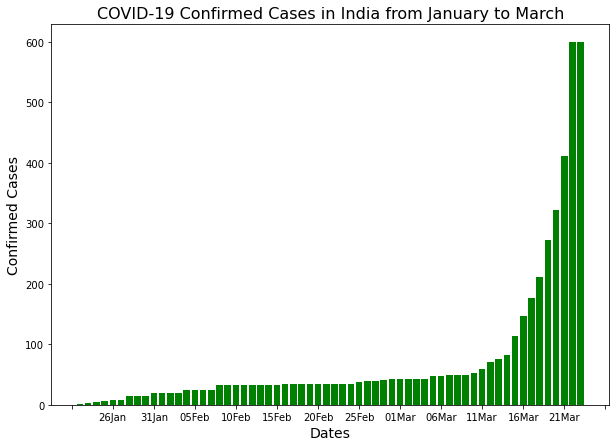

In [12]:
# bar plot for the data
plt.figure(figsize=(10,7))
plt.bar(x=df['date'],height=df['confirmed cases'],color='g')
# plt.plot(df.index,df['confirmed cases'],color='g')
plt.title('COVID-19 Confirmed Cases in India from January to March',fontsize=16)
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Confirmed Cases',fontsize=14)

# adding a gap of 4days on the dates axix for convience of view
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


(0.0, 1.0, 1.9, 599.1)

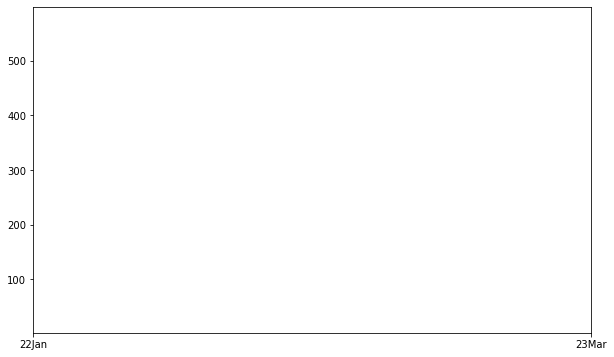

In [30]:
#animating the plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.axis(xmin = df['date'][0],xmax = df['date'][len(df)-1])
ax.axis(ymin=(df['confirmed cases'].min()-0.1), ymax =(df['confirmed cases'].max()+0.1))



In [31]:
# defining the animation function
def animate(i):
    data = df.iloc[:int(i+1)]
    xp,yp,zp = [],[],[]
    lines = data
    
    # first get the values for plot
    for line in lines:
        xp = data.index
        yp = data['date']
        zp = data['confirmed cases']
        
    ax.clear()
    ax.plot(yp,xp)
    
    plt.xlabel('Dates',fontsize = 14)
    plt.ylabel('Confirmed Cases',fontsize = 14)
    plt.title('COVID-19 Confirmed Cases in India from January to March',fontsize=16)


In [32]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [33]:
ani = animation.FuncAnimation(fig, animate, frames = len(df), interval=10) 

MovieWriter stderr:
[libopenh264 @ 0x7f7d8b00cc00] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x432', '-pix_fmt', 'rgba', '-r', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', 'India Confirmed Covid Cases.mp4']' returned non-zero exit status 1.

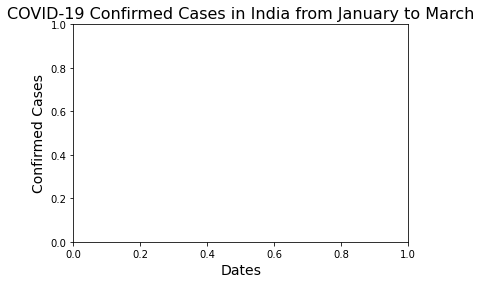

In [34]:
ani.save('India Confirmed Covid Cases.mp4', writer=writer)

#### Q2. Apply Principal Component Analysis (PCA) to the standardised input parameters of Droplet Data.csv provided in Moodle under Week 8. This dataset has five input parameters, which include area, count, maximum Feret diameter, minimum Feret diameter and perimeter. It also includes the class/category column, which is the response. 

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [147]:
data = pd.read_csv('DropletData.csv',index_col=0)
data.head()

,Area,Count,maxFeret,minFeret,Perimeter,class
1,34.597073,1394,7.178624,4.846646,24.155433,U
2,37.834522,1294,7.534622,5.069885,25.006611,U
3,37.423876,1338,7.354161,4.994525,24.084755,U
4,36.133785,1374,7.267336,4.817726,23.775612,U
5,31.652493,1566,6.917425,4.656928,22.818458,U


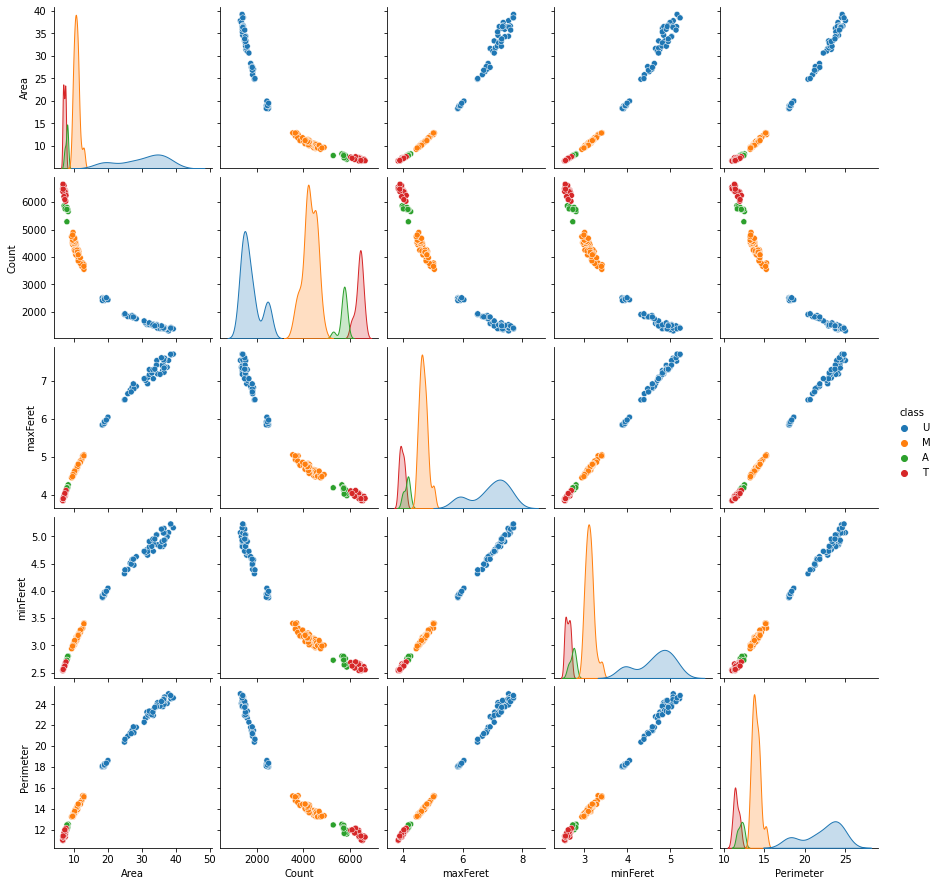

In [183]:
sns.pairplot(data= data, hue='class')

In [148]:
features=['Area','Count','maxFeret','minFeret','Perimeter']
x=data.loc[:,features].values
y=data.loc[:,['class']].values
print(x,y)

[[3.45970732e+01 1.39400000e+03 7.17862410e+00 4.84664562e+00
  2.41554333e+01]
 [3.78345224e+01 1.29400000e+03 7.53462210e+00 5.06988485e+00
  2.50066113e+01]
 [3.74238759e+01 1.33800000e+03 7.35416069e+00 4.99452466e+00
  2.40847549e+01]
 [3.61337853e+01 1.37400000e+03 7.26733552e+00 4.81772635e+00
  2.37756121e+01]
 [3.16524930e+01 1.56600000e+03 6.91742529e+00 4.65692784e+00
  2.28184585e+01]
 [3.67687650e+01 1.40400000e+03 7.36201709e+00 4.93894231e+00
  2.42178825e+01]
 [3.65176131e+01 1.38800000e+03 7.22069524e+00 4.85047694e+00
  2.40002413e+01]
 [3.53461972e+01 1.37900000e+03 7.16657215e+00 4.81494851e+00
  2.38266875e+01]
 [3.59270670e+01 1.38700000e+03 7.40359697e+00 4.90613626e+00
  2.43376914e+01]
 [3.65293056e+01 1.36800000e+03 7.33229678e+00 4.92938450e+00
  2.43722807e+01]
 [3.14644542e+01 1.53000000e+03 7.07106536e+00 4.75777190e+00
  2.32567183e+01]
 [3.10658601e+01 1.58700000e+03 7.00827788e+00 4.70174039e+00
  2.26803567e+01]
 [3.17739929e+01 1.54700000e+03 7.090623

In [149]:
# standaedise the features
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x,columns=features).head()

,Area,Count,maxFeret,minFeret,Perimeter
0,1.739649,-1.448516,1.532514,1.557877,1.760829
1,2.049832,-1.508493,1.821726,1.822674,1.950229
2,2.010488,-1.482103,1.675120,1.733285,1.745102
3,1.886883,-1.460511,1.604583,1.523574,1.676313
4,1.457526,-1.345356,1.320317,1.332841,1.463332


In [150]:
x[1][0]

2.0498319292057867

In [151]:
# pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4
0,3.596671,0.177705,0.139577,-0.092419
1,4.096581,0.358027,0.097268,-0.036432
2,3.868550,0.307467,0.162864,0.085594
3,3.646536,0.230047,0.215934,0.004353
4,3.094371,0.040972,0.122032,-0.047153


In [152]:
data[['class']].head()

,class
1,U
2,U
3,U
4,U
5,U


In [153]:
finalDf = pd.concat([principalDf,data[['class']]],axis=1)
finalDf.isna

<bound method DataFrame.isna of      principal component 1  principal component 2  principal component 3  \
0                 3.596671               0.177705               0.139577   
1                 4.096581               0.358027               0.097268   
2                 3.868550               0.307467               0.162864   
3                 3.646536               0.230047               0.215934   
4                 3.094371               0.040972               0.122032   
..                     ...                    ...                    ...   
146              -2.692321               0.613840              -0.035139   
147              -2.486891               0.418966               0.025037   
148              -2.369839               0.395206               0.014852   
149              -2.632789               0.528962              -0.000128   
150                    NaN                    NaN                    NaN   

     principal component 4 class  
0                -0.

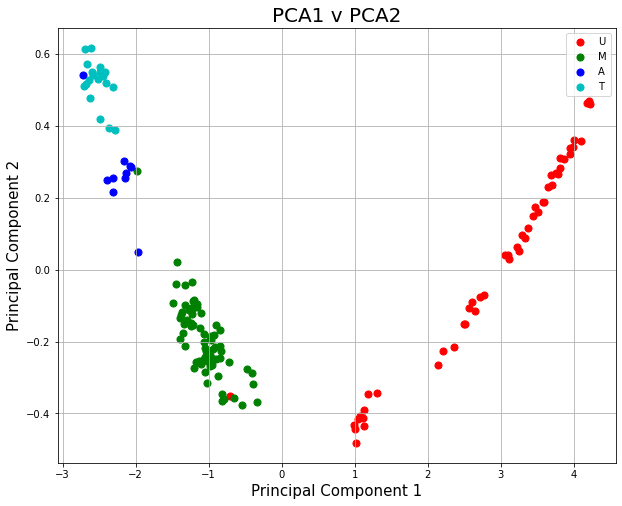

In [165]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA1 v PCA2', fontsize = 20)


targets = ['U','M','A','T']
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

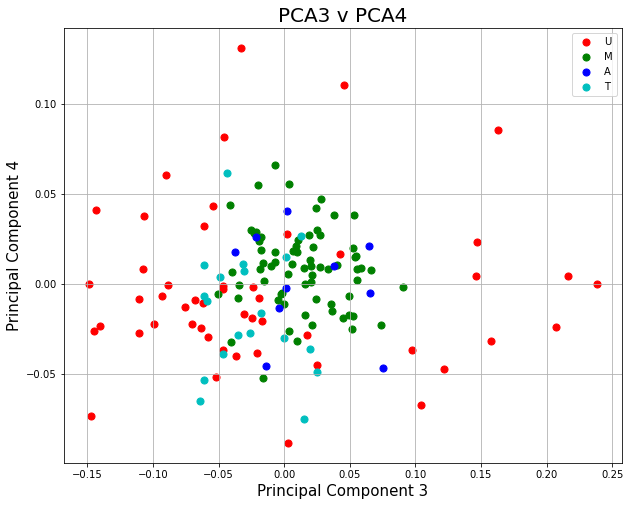

In [155]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA3 v PCA4', fontsize = 20)


targets = ['U','M','A','T']
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

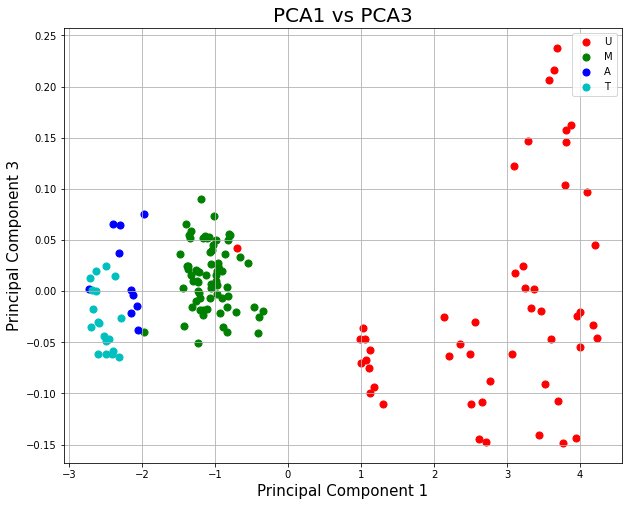

In [156]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA1 vs PCA3', fontsize = 20)


targets = ['U','M','A','T']
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

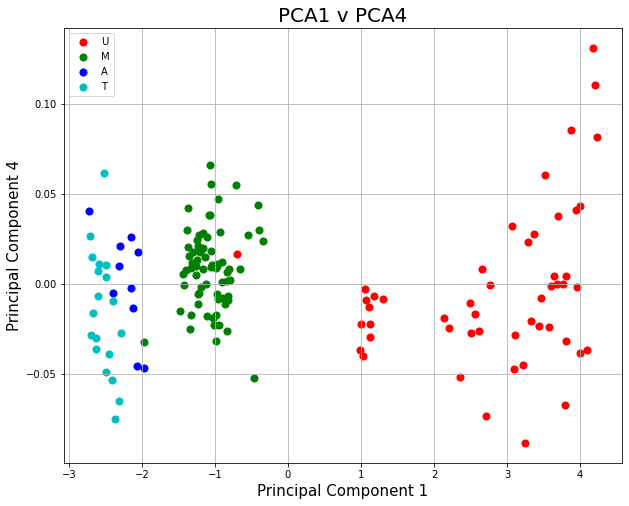

In [157]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA1 v PCA4', fontsize = 20)


targets = ['U','M','A','T']
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

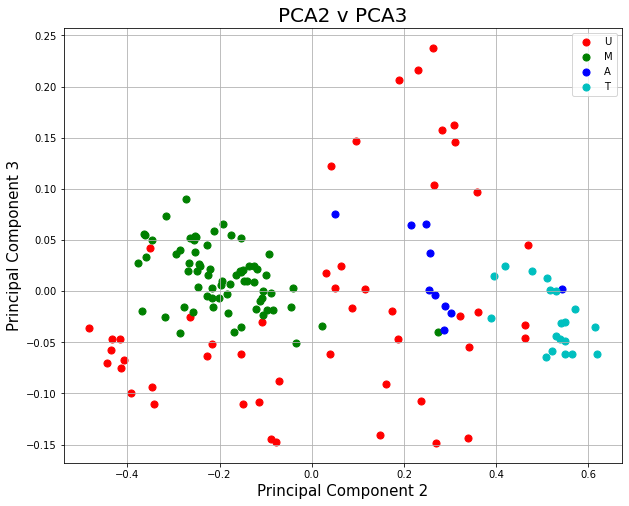

In [158]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA2 v PCA3', fontsize = 20)


targets = ['U','M','A','T']
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

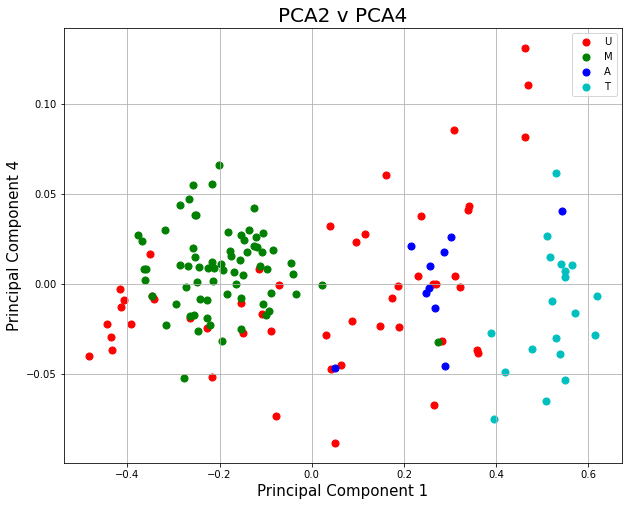

In [159]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA2 v PCA4', fontsize = 20)


targets = ['U','M','A','T']
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [163]:
# lets see the variance
pca.explained_variance_ratio_

array([9.80688381e-01, 1.81188408e-02, 8.88029477e-04, 2.33121040e-04])

In [175]:
# egenvalues
print(abs(pca.components_))

[[0.44618873 0.43656399 0.45116053 0.451084   0.45089345]
 [0.49058303 0.84763725 0.09180953 0.08422248 0.15911304]
 [0.64383834 0.28508128 0.46101373 0.53377787 0.08214852]
 [0.3607763  0.09315375 0.11910355 0.46561237 0.79384023]]


<AxesSubplot:xlabel='PC'>

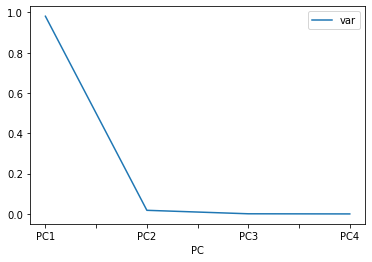

In [173]:
pcdf = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']})
pcdf.plot(y = "var", x = "PC")

#### PC1 could be the best model we could get as it considers all the variables, while the rest focuses moslty on one of the variable. 
When said that if we want to analyze something we should be considering all the possible variable not just one value and PC1 seems to be a good fit for analying the dataset
as the lower variance values tells us that the data lies further away from each other in the cluster, i.e. mostly independent to each other

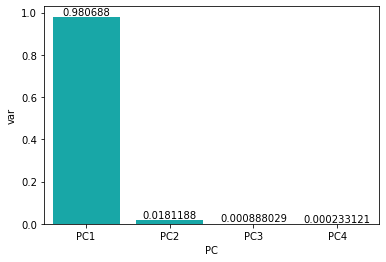

In [180]:
# see in the graph
pcdf = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']})
ax = sns.barplot(x='PC', y="var", data=pcdf, color="c");
for i in ax.containers:
    ax.bar_label(i,)
    

In [176]:
#k-means clustering
pca.explained_variance_ratio_

array([9.80688381e-01, 1.81188408e-02, 8.88029477e-04, 2.33121040e-04])

#### feature 1 i.e. Area has the 98% of confidence to explain the class of the model,  so the area seems to have majority of contribution for the class

In [185]:
from sklearn.cluster import KMeans

nclusters = 4 # this is the k in kmeans
seed = 0 # seed is set to reproduce the prediction output/results

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
y_cluster_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [187]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4
0,3.596671,0.177705,0.139577,-0.092419
1,4.096581,0.358027,0.097268,-0.036432
2,3.868550,0.307467,0.162864,0.085594
3,3.646536,0.230047,0.215934,0.004353
4,3.094371,0.040972,0.122032,-0.047153


In [192]:
data['class'] = data['class'].astype('category')
y_array = data['class'].cat.codes

df_plot = principalDf.copy()
df_plot['clusterKmeans'] = y_cluster_kmeans
df_plot['class'] = y_array
df_plot

,principal component 1,principal component 2,principal component 3,principal component 4,clusterKmeans,class
0,3.596671,0.177705,0.139577,-0.092419,2,NaN
1,4.096581,0.358027,0.097268,-0.036432,2,3.0
2,3.868550,0.307467,0.162864,0.085594,2,3.0
3,3.646536,0.230047,0.215934,0.004353,2,3.0
4,3.094371,0.040972,0.122032,-0.047153,2,3.0
...,...,...,...,...,...,...
145,-2.624737,0.477363,0.019589,-0.036265,3,2.0
146,-2.692321,0.613840,-0.035139,-0.028143,3,2.0
147,-2.486891,0.418966,0.025037,-0.048871,3,2.0
148,-2.369839,0.395206,0.014852,-0.074819,3,2.0
